In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [ ]:
df = pd.read_csv("/content/MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,161.149994,163.380005,160.199997,162.279999,157.765762,32078100
1,2020-01-28,163.779999,165.759995,163.070007,165.460007,160.857330,24899900
2,2020-01-29,167.839996,168.750000,165.690002,168.039993,163.365555,34754500
3,2020-01-30,174.050003,174.050003,170.789993,172.779999,167.973679,51597500
4,2020-01-31,172.210007,172.399994,169.580002,170.229996,165.494614,36142700
...,...,...,...,...,...,...,...
725,2022-12-09,244.699997,248.309998,244.160004,245.419998,245.419998,20609700
726,2022-12-12,247.449997,252.539993,247.169998,252.509995,252.509995,30665100
727,2022-12-13,261.690002,263.920013,253.070007,256.920013,256.920013,42196900
728,2022-12-14,257.130005,262.589996,254.309998,257.220001,257.220001,35410900


In [ ]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,161.149994,163.380005,160.199997,162.279999,157.765762,32078100
1,2020-01-28,163.779999,165.759995,163.070007,165.460007,160.857330,24899900
2,2020-01-29,167.839996,168.750000,165.690002,168.039993,163.365555,34754500
3,2020-01-30,174.050003,174.050003,170.789993,172.779999,167.973679,51597500
4,2020-01-31,172.210007,172.399994,169.580002,170.229996,165.494614,36142700


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
725,2022-12-09,244.699997,248.309998,244.160004,245.419998,245.419998,20609700
726,2022-12-12,247.449997,252.539993,247.169998,252.509995,252.509995,30665100
727,2022-12-13,261.690002,263.920013,253.070007,256.920013,256.920013,42196900
728,2022-12-14,257.130005,262.589996,254.309998,257.220001,257.220001,35410900
729,2022-12-15,253.720001,254.199997,247.339996,249.009995,249.009995,35560400


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,247.690685,250.499329,244.796904,247.760370,244.668787,3.184903e+07
std,46.880595,46.844195,46.637965,46.787704,47.316278,1.353391e+07
min,137.009995,140.570007,132.520004,135.419998,132.012527,9.200800e+06
25%,213.682503,215.482502,211.252499,213.674999,209.425964,2.297498e+07
50%,246.360001,249.449997,244.215004,247.349998,245.195121,2.870665e+07
75%,285.667495,289.250000,281.162507,285.517494,282.667191,3.603788e+07
max,344.619995,349.670013,342.200012,343.109985,339.924866,9.701270e+07


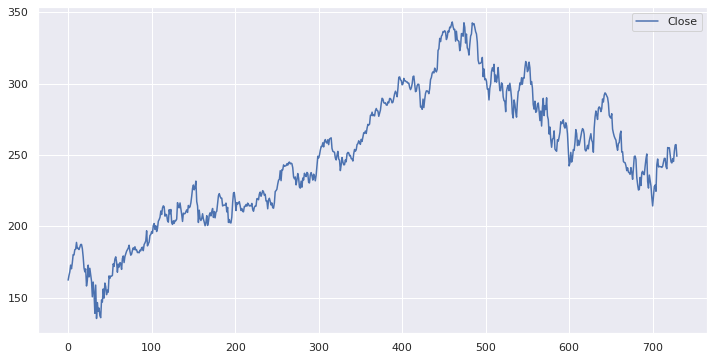

In [ ]:
df[['Close']].plot(figsize=(12,6));


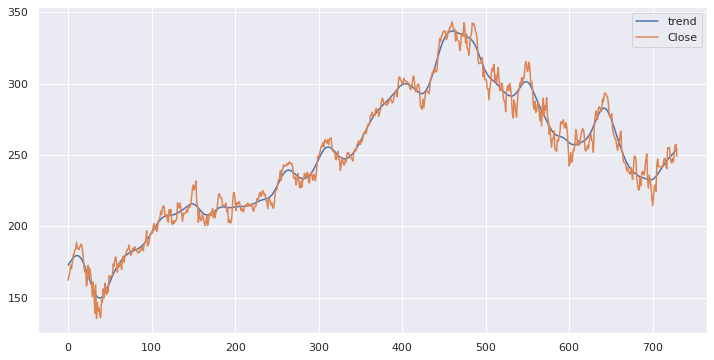

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [ ]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.5973829304166978,
 0.4849079907532416,
 9,
 720,
 {'1%': -3.439464954327953,
  '5%': -2.8655625802683473,
  '10%': -2.5689120852623457},
 4266.584426971725)

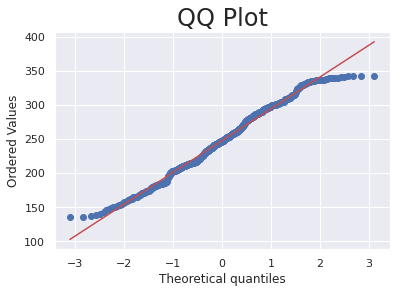

In [ ]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [ ]:
df['returns'] = df.Close.pct_change(1)*100


In [ ]:
df['sq_returns'] = df.returns.mul(df.returns)


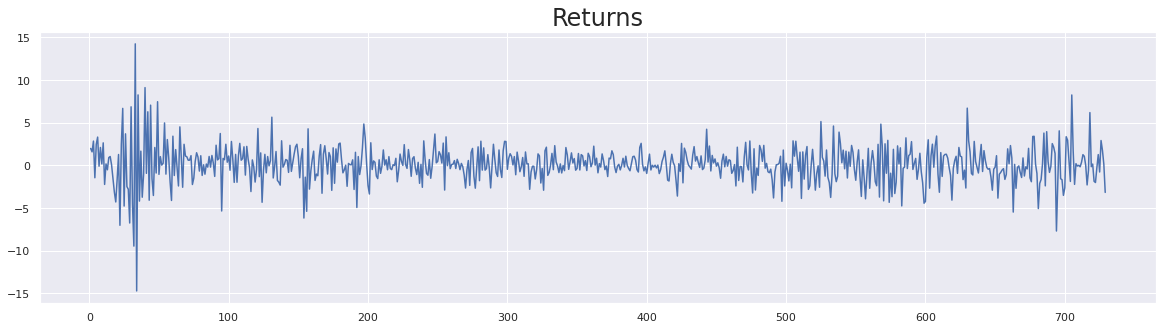

In [ ]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()

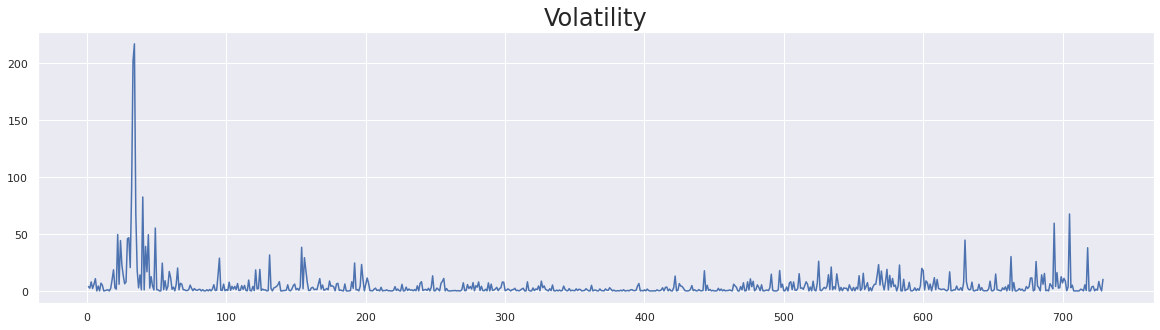

In [ ]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

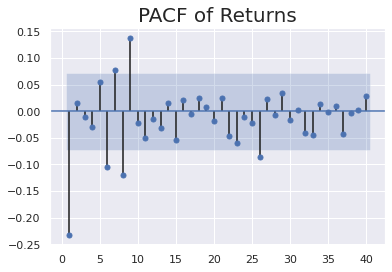

In [ ]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

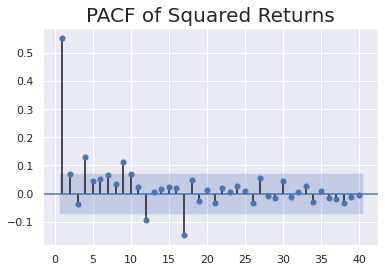

In [ ]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [ ]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 28.6 MB/s eta 0:00:00


In [ ]:
from arch import arch_model


In [ ]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [ ]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 201684.4431906942
Iteration:      2,   Func. Count:     12,   Neg. LLF: 5625.75873290867
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1590.9353191599146
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1552.5831094199427
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1552.583107568851
Iteration:      6,   Func. Count:     31,   Neg. LLF: 1552.5831075688561
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1552.583107568851
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1552.58
Distribution:                  Normal   AIC:                           3111.17
Method:            Maximum Likelihood   BIC:                           3124.94
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:47:43   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1416  7.560e-02      1.873  6.105e-02 [-6.564e-03,  0.290]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.0451      0.339      8.973  2.893e-19 [  2.380,  3.710]
alpha[1]       0.3582      0.101      3.557  3.758e-04 [  0.161,  0.556]
========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1535.754795045254
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1535.7547195704863
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1535.75
Distribution:                  Normal   AIC:                           3079.51
Method:            Maximum Likelihood   BIC:                           3097.88
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:47:50   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1309  7.145e-02      1.832  6.700e-02 [-9.168e-03,  0.271]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.4265      0.308      7.891  3.003e-15   [  1.824,  3.029]
alpha[1]       0.2700  9.431e-02      2.863  4.193e-03 [8.519e-02,  0.455]
alpha[2]       0.2152  7.404e-02      2.906  3.657e-03 [7.006e-02,  0.360]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 1542.9655295979326
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1528.50285043741
            Iterations: 7
            Function evaluations: 53
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1528.50
Distribution:                  Normal   AIC:                           3067.01
Method:            Maximum Likelihood   BIC:                           3089.96
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:47:55   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1179  6.967e-02      1.693  9.049e-02 [-1.861e-02,  0.254]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.0206      0.305      6.627  3.422e-11   [  1.423,  2.618]
alpha[1]       0.2067  9.307e-02      2.221  2.634e-02 [2.430e-02,  0.389]
alpha[2]       0.1948  6.913e-02      2.818  4.827e-03 [5.934e-02,  0.330]
alpha[3]       0.1839  9.100e-02      2.020  4.334e-02 [5.505e-03,  0.362]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     86,   Neg. LLF: 3265.606580209986
Iteration:     10,   Func. Count:    172,   Neg. LLF: 1543.9480439291492
Iteration:     15,   Func. Count:    257,   Neg. LLF: 1514.1713376984897
Iteration:     20,   Func. Count:    342,   Neg. LLF: 1499.3272625041743
Iteration:     25,   Func. Count:    425,   Neg. LLF: 1499.3261922190322
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1499.3261922190263
            Iterations: 25
            Function evaluations: 425
            Gradient evaluations: 25


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1499.33
Distribution:                  Normal   AIC:                           3028.65
Method:            Maximum Likelihood   BIC:                           3097.53
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:48:02   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1195  6.444e-02      1.855  6.360e-02 [-6.764e-03,  0.246]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.0491      0.291      3.601  3.175e-04      [  0.478,  1.620]
alpha[1]       0.1877  7.742e-02      2.425  1.533e-02    [3.597e-02,  0.339]
alpha[2]       0.0727  3.983e-02      1.825  6.794e-02   [-5.358e-03,  0.151]
alpha[3]       0.1005  6.123e-02      1.642      0.101   [-1.946e-02,  0.221]
alpha[4]       0.0298  4.995e-02      0.597      0.550   [-6.806e-02,  0.128]
alpha[5]       0.0815  5.156e-02      1.581      0.114   [-1.954e-02,  0.183]
alpha[6]   4.2044e-12  4.091e-02  1.028e-10      1.000 [-8.018e-02,8.018e-02]
alpha[7]       0.0875  5.353e-02      1.635      0.102   [-1.742e-02,  0.192]
alpha[8]       0.0000  2.310e-02      0.000      1.000 [-4.528e-02,4.528e-02]
alpha[9]   1.4323e-12  5.258e-02  2.724e-11      1.000      [ -0.103,  0.103]
alpha[10]      0.0449  5.007e-02      0.897      0.370   [-5.323e-02,  0.143]
alpha[11]      0.0874  4.694e-02      1.862  6.265e-02   [-4.615e-03,  0.179]
alpha[12]  4.1002e-11  8.120e-02  5.050e-10      1.000      [ -0.159,  0.159]
alpha[13]      0.0750  4.459e-02      1.682  9.254e-02   [-1.239e-02,  0.162]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1615.5816340041624
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1508.0721853193043
            Iterations: 8
            Function evaluations: 53
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1508.07
Distribution:                  Normal   AIC:                           3024.14
Method:            Maximum Likelihood   BIC:                           3042.51
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:48:16   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1131  6.413e-02      1.763  7.787e-02 [-1.262e-02,  0.239]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1101  8.994e-02      1.224      0.221 [-6.617e-02,  0.286]
alpha[1]       0.1160  4.149e-02      2.796  5.168e-03  [3.471e-02,  0.197]
beta[1]        0.8619  5.575e-02     15.461  6.382e-54    [  0.753,  0.971]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1520.953194849004
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1507.5674753463502
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1507.5674728314807
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1507.57
Distribution:                  Normal   AIC:                           3025.13
Method:            Maximum Likelihood   BIC:                           3048.09
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:48:23   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1101  6.397e-02      1.720  8.537e-02 [-1.533e-02,  0.235]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1390      0.115      1.204      0.229 [-8.732e-02,  0.365]
alpha[1]       0.1519  7.179e-02      2.116  3.438e-02  [1.118e-02,  0.293]
beta[1]        0.4878      0.473      1.031      0.302    [ -0.439,  1.415]
beta[2]        0.3326      0.414      0.803      0.422    [ -0.479,  1.145]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 1516.3433457567737
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1507.4758563967123
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1507.4739840360946
            Iterations: 14
            Function evaluations: 111
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1507.47
Distribution:                  Normal   AIC:                           3026.95
Method:            Maximum Likelihood   BIC:                           3054.50
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:48:31   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1114  6.426e-02      1.734  8.290e-02 [-1.452e-02,  0.237]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1373      0.116      1.188      0.235 [-8.917e-02,  0.364]
alpha[1]       0.1525  6.732e-02      2.266  2.348e-02  [2.057e-02,  0.284]
beta[1]        0.5754      0.469      1.228      0.219    [ -0.343,  1.494]
beta[2]        0.0952      0.596      0.160      0.873    [ -1.073,  1.263]
beta[3]        0.1491      0.303      0.492      0.623    [ -0.445,  0.743]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 1516.8397988591955
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1508.072185308682
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1508.072185308682
            Iterations: 11
            Function evaluations: 78
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1508.07
Distribution:                  Normal   AIC:                           3026.14
Method:            Maximum Likelihood   BIC:                           3049.10
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:48:36   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1131  6.416e-02      1.762  7.802e-02 [-1.268e-02,  0.239]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1101      0.102      1.083      0.279 [-8.921e-02,  0.309]
alpha[1]       0.1160  6.351e-02      1.827  6.769e-02 [-8.440e-03,  0.241]
alpha[2]       0.0000  8.022e-02      0.000      1.000    [ -0.157,  0.157]
beta[1]        0.8619  6.905e-02     12.482  9.372e-36    [  0.727,  0.997]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 1508.543179765516
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1508.0721922020505
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1508.0721853079467
            Iterations: 12
            Function evaluations: 95
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1508.07
Distribution:                  Normal   AIC:                           3028.14
Method:            Maximum Likelihood   BIC:                           3055.69
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:48:42   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1131  6.473e-02      1.747  8.068e-02 [-1.380e-02,  0.240]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1101      0.131      0.840      0.401    [ -0.147,  0.367]
alpha[1]       0.1160  6.349e-02      1.828  6.761e-02 [-8.405e-03,  0.240]
alpha[2]       0.0000  7.804e-02      0.000      1.000    [ -0.153,  0.153]
alpha[3]       0.0000  7.765e-02      0.000      1.000    [ -0.152,  0.152]
beta[1]        0.8619      0.102      8.489  2.078e-17    [  0.663,  1.061]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 11538.720021841866
Iteration:     10,   Func. Count:     80,   Neg. LLF: 1494.8312525824444
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1494.8311808131928
            Iterations: 14
            Function evaluations: 108
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1494.83
Distribution:                  Normal   AIC:                           2999.66
Method:            Maximum Likelihood   BIC:                           3022.62
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:48:51   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0165  6.515e-04     25.253 1.054e-140 [1.518e-02,1.773e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0386  1.575e-02      2.452  1.419e-02 [7.756e-03,6.951e-02]
alpha[1]       0.1237  6.081e-02      2.034  4.193e-02   [4.513e-03,  0.243]
gamma[1]      -0.1229  3.557e-02     -3.455  5.512e-04  [ -0.193,-5.316e-02]
beta[1]        0.9741  1.088e-02     89.541      0.000     [  0.953,  0.995]
============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1498.49
Distribution:                  Normal   AIC:                           3006.98
Method:            Maximum Likelihood   BIC:                           3029.94
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:49:13   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0625  5.812e-02      1.075      0.283 [-5.146e-02,  0.176]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0632  9.439e-02      0.670      0.503   [ -0.122,  0.248]
alpha[1]   2.2841e-14  8.718e-02  2.620e-13      1.000   [ -0.171,  0.171]
gamma[1]       0.1340  4.262e-02      3.144  1.669e-03 [5.045e-02,  0.218]
beta[1]        0.9181      0.104      8.805  1.313e-18   [  0.714,  1.122]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1497.7431063256133
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1495.9178318056656
Iteration:     15,   Func. Count:    105,   Neg. LLF: 1495.8889661991502
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1495.8889661991502
            Iterations: 15
            Function evaluations: 105
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1495.89
Distribution:                  Normal   AIC:                           3001.78
Method:            Maximum Likelihood   BIC:                           3024.74
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:49:26   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0103  6.159e-02      0.167      0.868 [ -0.110,  0.131]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0551  3.497e-02      1.576      0.115 [-1.343e-02,  0.124]
alpha[1]       0.0172  4.697e-02      0.365      0.715 [-7.490e-02,  0.109]
gamma[1]       0.1293  3.826e-02      3.380  7.239e-04  [5.434e-02,  0.204]
beta[1]        0.9113  4.773e-02     19.095  2.756e-81    [  0.818,  1.005]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import FIGARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 1508.9418991634993
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1508.8627473499218
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1508.8627473499218
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1508.86
Distribution:                  Normal   AIC:                           3027.73
Method:            Maximum Likelihood   BIC:                           3050.68
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:49:41   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1163  7.775e-02      1.496      0.135 [-3.610e-02,  0.269]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0955      0.352      0.272      0.786 [ -0.594,  0.785]
phi            0.1588      0.240      0.662      0.508 [ -0.311,  0.629]
d              0.6824      2.157      0.316      0.752 [ -3.545,  4.910]
beta           0.6884      2.249      0.306      0.760 [ -3.719,  5.096]
========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import HARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1763.7364136732363
Iteration:     10,   Func. Count:     55,   Neg. LLF: 1552.6291239874163
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1552.5831075683661
            Iterations: 14
            Function evaluations: 70
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1552.58
Distribution:                  Normal   AIC:                           3111.17
Method:            Maximum Likelihood   BIC:                           3124.94
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:50:10   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1416  7.560e-02      1.873  6.104e-02 [-6.561e-03,  0.290]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.0451      0.339      8.973  2.892e-19 [  2.380,  3.710]
alpha[1]       0.3582      0.101      3.557  3.758e-04 [  0.161,  0.556]
========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import APARCH


In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 1811.1811810787476
Iteration:     10,   Func. Count:     87,   Neg. LLF: 1497.8193305250566
Iteration:     15,   Func. Count:    124,   Neg. LLF: 1495.904366223194
Iteration:     20,   Func. Count:    159,   Neg. LLF: 1495.8558675509746
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1495.8556779845114
            Iterations: 23
            Function evaluations: 179
            Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1495.86
Distribution:                  Normal   AIC:                           3003.71
Method:            Maximum Likelihood   BIC:                           3031.26
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        23:50:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0249  6.470e-02      0.386      0.700 [ -0.102,  0.152]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0494  3.027e-02      1.633      0.102 [-9.896e-03,  0.109]
alpha[1]       0.0616  2.136e-02      2.883  3.935e-03  [1.972e-02,  0.103]
gamma[1]       0.9997  1.367e-02     73.104      0.000    [  0.973,  1.027]
beta[1]        0.9251  2.834e-02     32.644 9.751e-234    [  0.870,  0.981]
delta          1.1613      0.238      4.876  1.083e-06    [  0.695,  1.628]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
from scipy import stats


In [ ]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=13.641069242186076, pvalue=0.0010911374212366765)

In [ ]:
jarque_bera_test.statistic

13.641069242186076

In [ ]:
jarque_bera_test.pvalue

0.0010911374212366765

jarquer-bera para los retornos

In [ ]:
returns = df.returns[1:]
returns


1      1.959581
2      1.559281
3      2.820761
4     -1.475867
5      2.437884
         ...   
725   -0.800322
726    2.888924
727    1.746473
728    0.116763
729   -3.191823
Name: returns, Length: 729, dtype: float64

In [ ]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=1183.010199213044, pvalue=0.0)

In [ ]:
jarque_bera_test.statistic

1183.010199213044

In [ ]:
jarque_bera_test.pvalue

0.0

curtosis

In [ ]:
returns.kurt()

6.292019619002565

coef. asimetria

In [ ]:
returns.skew()

-0.006150151528310189

In [ ]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -34.661
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -2.574
P-value                         0.010
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -8.906
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.271
P-value                         0.164
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        730 non-null    object 
 1   Open        730 non-null    float64
 2   High        730 non-null    float64
 3   Low         730 non-null    float64
 4   Close       730 non-null    float64
 5   Adj Close   730 non-null    float64
 6   Volume      730 non-null    int64  
 7   trend       730 non-null    float64
 8   returns     729 non-null    float64
 9   sq_returns  729 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 57.2+ KB


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
pip install yahoo-finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 7.5 MB/s eta 0:00:00
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-py3-none-any.whl size=7233 sha256=cb56112475034797046e40d4fe84b7fe1859bb05a4be1fe8a112bf59ef55df4a
  Stored in directory: /root/.cache/pip/wheels/80/c8/73/b05bf4d7f056ee7be447dedbc38e2acaf923e2c70828605f34
Successfully built yahoo-finance


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf


BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [ ]:
def trading_window(data):

  # 1 day window
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)

  # return the new dataset
  return data

In [ ]:
data = pd.read_csv("/content/MSFT.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,161.149994,163.380005,160.199997,162.279999,157.765762,32078100
1,2020-01-28,163.779999,165.759995,163.070007,165.460007,160.857330,24899900
2,2020-01-29,167.839996,168.750000,165.690002,168.039993,163.365555,34754500
3,2020-01-30,174.050003,174.050003,170.789993,172.779999,167.973679,51597500
4,2020-01-31,172.210007,172.399994,169.580002,170.229996,165.494614,36142700
...,...,...,...,...,...,...,...
725,2022-12-09,244.699997,248.309998,244.160004,245.419998,245.419998,20609700
726,2022-12-12,247.449997,252.539993,247.169998,252.509995,252.509995,30665100
727,2022-12-13,261.690002,263.920013,253.070007,256.920013,256.920013,42196900
728,2022-12-14,257.130005,262.589996,254.309998,257.220001,257.220001,35410900


In [ ]:
data = data[["Date","Close","Volume"]]


In [ ]:
data

,Date,Close,Volume
0,2020-01-27,162.279999,32078100
1,2020-01-28,165.460007,24899900
2,2020-01-29,168.039993,34754500
3,2020-01-30,172.779999,51597500
4,2020-01-31,170.229996,36142700
...,...,...,...
725,2022-12-09,245.419998,20609700
726,2022-12-12,252.509995,30665100
727,2022-12-13,256.920013,42196900
728,2022-12-14,257.220001,35410900


In [ ]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,162.279999,32078100,165.460007
1,2020-01-28,165.460007,24899900,168.039993
2,2020-01-29,168.039993,34754500,172.779999
3,2020-01-30,172.779999,51597500,170.229996
4,2020-01-31,170.229996,36142700,174.380005
...,...,...,...,...
725,2022-12-09,245.419998,20609700,252.509995
726,2022-12-12,252.509995,30665100,256.920013
727,2022-12-13,256.920013,42196900,257.220001
728,2022-12-14,257.220001,35410900,249.009995


In [ ]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,162.279999,32078100,165.460007
1,2020-01-28,165.460007,24899900,168.039993
2,2020-01-29,168.039993,34754500,172.779999
3,2020-01-30,172.779999,51597500,170.229996
4,2020-01-31,170.229996,36142700,174.380005
...,...,...,...,...
724,2022-12-08,247.399994,22611800,245.419998
725,2022-12-09,245.419998,20609700,252.509995
726,2022-12-12,252.509995,30665100,256.920013
727,2022-12-13,256.920013,42196900,257.220001


In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [ ]:
price_volume_target_scaled_df

array([[0.12932738, 0.26052619, 0.1446387 ],
       [0.1446387 , 0.17878101, 0.15706099],
       [0.15706099, 0.29100498, 0.1798835 ],
       ...,
       [0.56377295, 0.24443498, 0.58500661],
       [0.58500661, 0.37575887, 0.58645101],
       [0.58645101, 0.29848005, 0.54692091]])

In [ ]:
price_volume_target_scaled_df.shape

(729, 3)

In [ ]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [ ]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((729, 2), (729, 1))

In [ ]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
X_train.shape, y_train.shape

((473, 2), (473, 1))

In [ ]:
X_test.shape, y_test.shape

((256, 2), (256, 1))

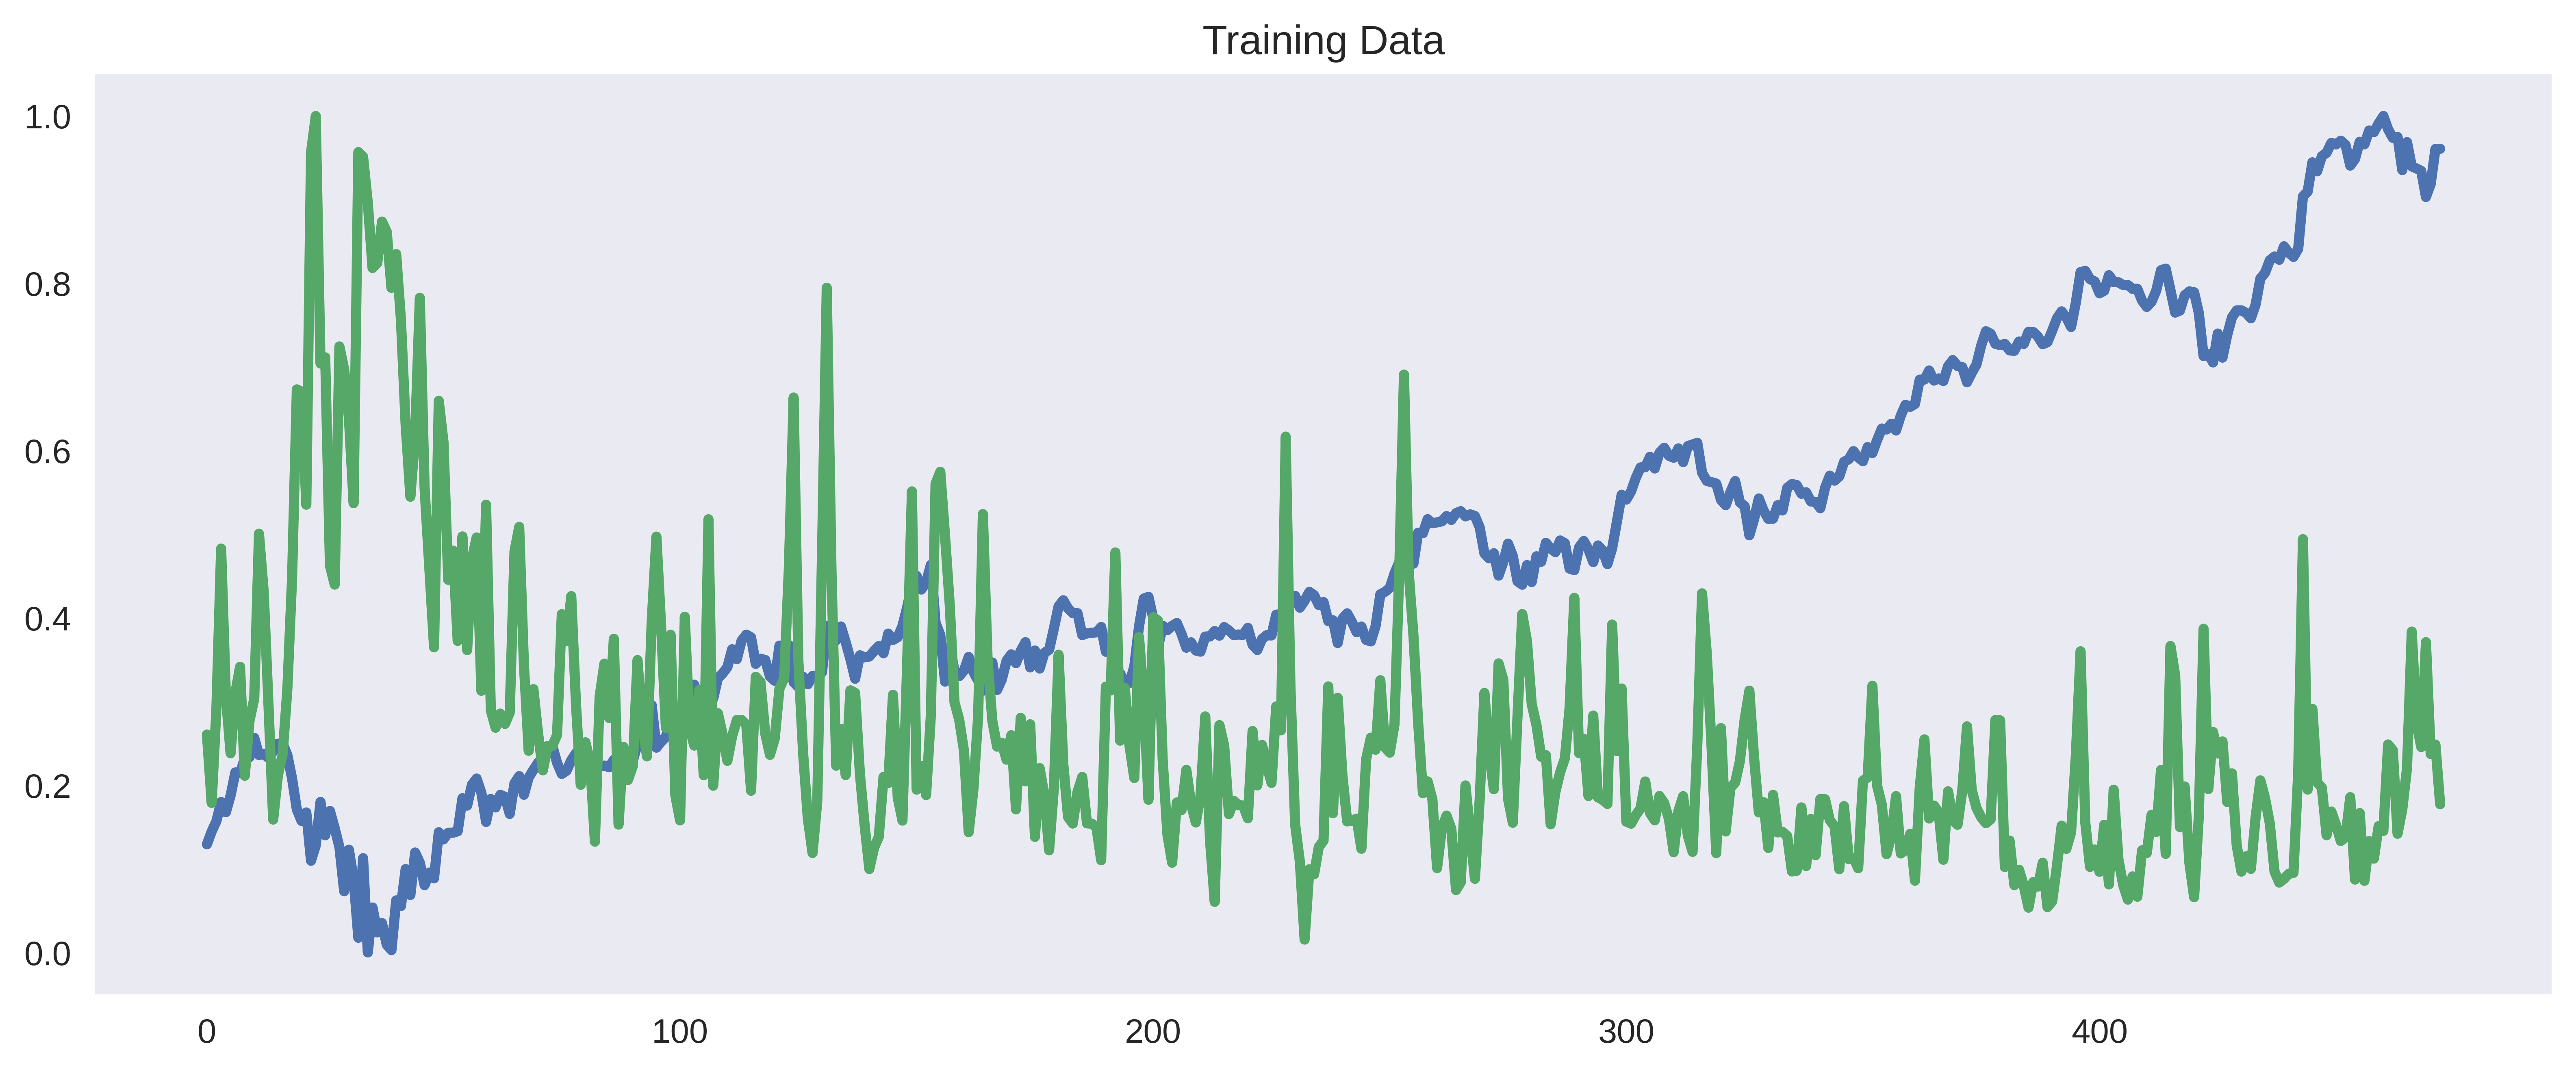

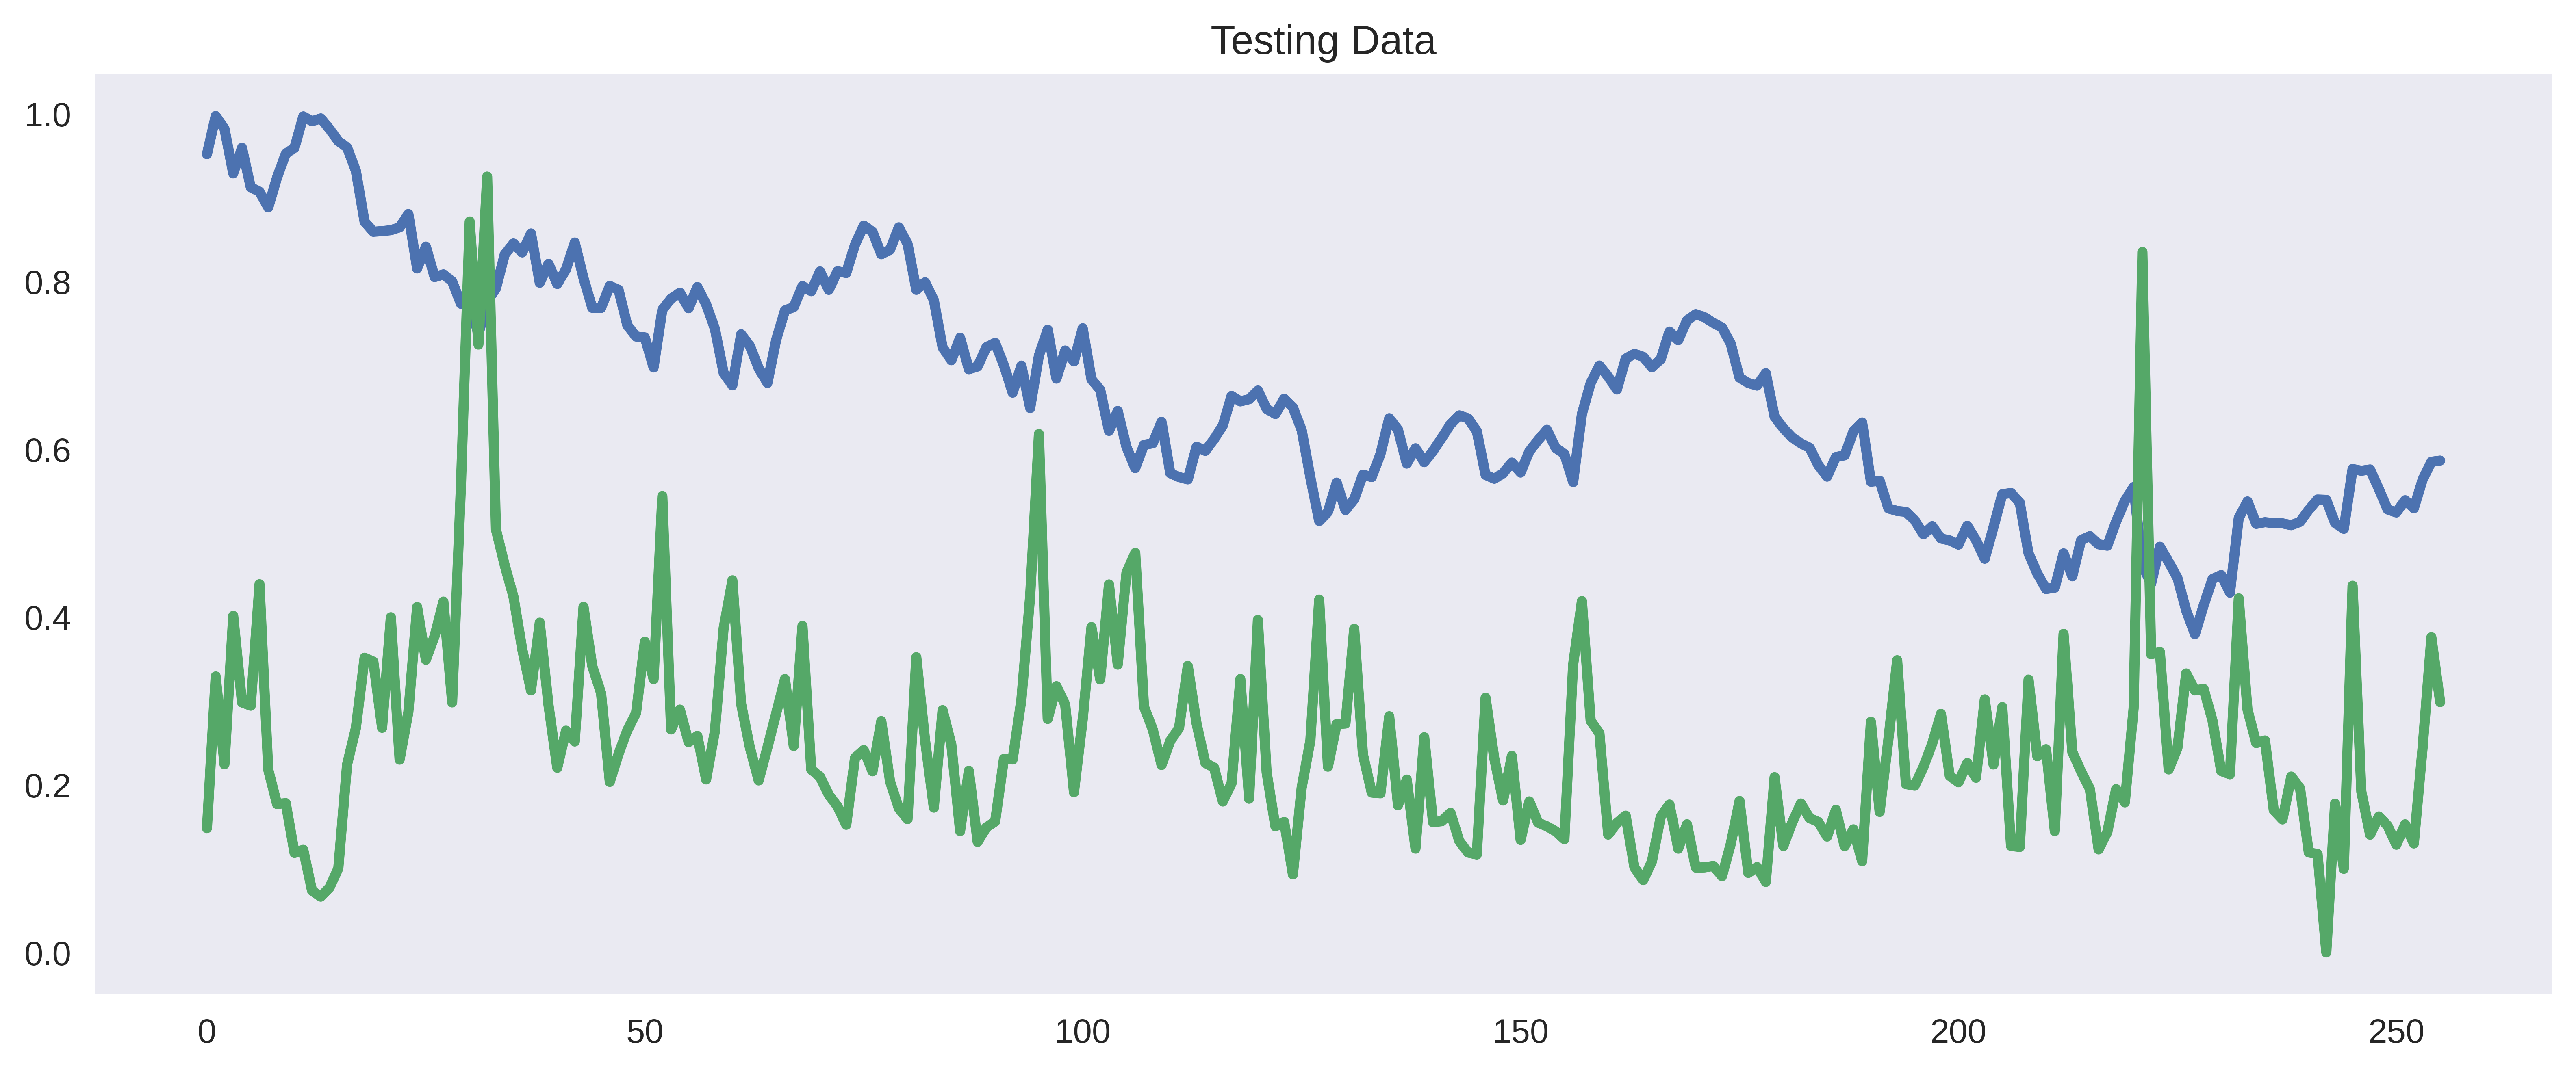

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [ ]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Test the model and calculate its accuracy
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9526613667362364


In [ ]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.1498724 ],
       [0.1675017 ],
       [0.17491536],
       [0.18909047],
       [0.18427408],
       [0.20581671],
       [0.22916481],
       [0.22695368],
       [0.24895699],
       [0.24760168],
       [0.26847905],
       [0.24147926],
       [0.24538739],
       [0.24600606],
       [0.25880841],
       [0.26532591],
       [0.26458449],
       [0.2485495 ],
       [0.21686625],
       [0.17314322],
       [0.16041135],
       [0.1751849 ],
       [0.10436295],
       [0.12011042],
       [0.18059676],
       [0.14262298],
       [0.17972323],
       [0.16111859],
       [0.12873768],
       [0.07994954],
       [0.12905984],
       [0.09982356],
       [0.01730775],
       [0.10751837],
       [0.00307667],
       [0.0568388 ],
       [0.02851905],
       [0.0371316 ],
       [0.01319758],
       [0.00954998],
       [0.06425546],
       [0.06081424],
       [0.10751066],
       [0.08163979],
       [0.12676887],
       [0.10892362],
       [0.09220232],
       [0.110

In [ ]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [ ]:
len(Predicted)

729

In [ ]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [ ]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
724,2022-12-08
725,2022-12-09
726,2022-12-12
727,2022-12-13


In [ ]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.129327
1,2020-01-28,0.144639
2,2020-01-29,0.157061
3,2020-01-30,0.179883
4,2020-01-31,0.167606
...,...,...
724,2022-12-08,0.539169
725,2022-12-09,0.529636
726,2022-12-12,0.563773
727,2022-12-13,0.585007


In [ ]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.129327,0.149872
1,2020-01-28,0.144639,0.167502
2,2020-01-29,0.157061,0.174915
3,2020-01-30,0.179883,0.189090
4,2020-01-31,0.167606,0.184274
...,...,...,...
724,2022-12-08,0.539169,0.541491
725,2022-12-09,0.529636,0.533358
726,2022-12-12,0.563773,0.561212
727,2022-12-13,0.585007,0.576219


In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

RED NEURONAL

TRAIN AN LSTM TIME SERIES MODEL


In [ ]:
data

,Date,Close,Volume,Target
0,2020-01-27,162.279999,32078100,165.460007
1,2020-01-28,165.460007,24899900,168.039993
2,2020-01-29,168.039993,34754500,172.779999
3,2020-01-30,172.779999,51597500,170.229996
4,2020-01-31,170.229996,36142700,174.380005
...,...,...,...,...
725,2022-12-09,245.419998,20609700,252.509995
726,2022-12-12,252.509995,30665100,256.920013
727,2022-12-13,256.920013,42196900,257.220001
728,2022-12-14,257.220001,35410900,249.009995


In [ ]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,162.279999,32078100,165.460007
1,2020-01-28,165.460007,24899900,168.039993
2,2020-01-29,168.039993,34754500,172.779999
3,2020-01-30,172.779999,51597500,170.229996
4,2020-01-31,170.229996,36142700,174.380005
...,...,...,...,...
725,2022-12-09,245.419998,20609700,252.509995
726,2022-12-12,252.509995,30665100,256.920013
727,2022-12-13,256.920013,42196900,257.220001
728,2022-12-14,257.220001,35410900,249.009995


In [ ]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.62279999e+02, 3.20781000e+07],
       [1.65460007e+02, 2.48999000e+07],
       [1.68039993e+02, 3.47545000e+07],
       ...,
       [2.56920013e+02, 4.21969000e+07],
       [2.57220001e+02, 3.54109000e+07],
       [2.49009995e+02, 3.55604000e+07]])

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [ ]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [ ]:
X

[array([0.12932738]),
 array([0.1446387]),
 array([0.15706099]),
 array([0.1798835]),
 array([0.16760557]),
 array([0.18758731]),
 array([0.21522461]),
 array([0.21416534]),
 array([0.23212485]),
 array([0.23337669]),
 array([0.25653619]),
 array([0.23602488]),
 array([0.23732492]),
 array([0.23251005]),
 array([0.24040643]),
 array([0.24945833]),
 array([0.24969909]),
 array([0.23592856]),
 array([0.20785787]),
 array([0.17078339]),
 array([0.1572055]),
 array([0.16731668]),
 array([0.10958639]),
 array([0.12802734]),
 array([0.17993162]),
 array([0.14006451]),
 array([0.16914636]),
 array([0.14853873]),
 array([0.12590886]),
 array([0.07318599]),
 array([0.12277915]),
 array([0.08767879]),
 array([0.01752612]),
 array([0.11271609]),
 array([0.]),
 array([0.05368583]),
 array([0.02397803]),
 array([0.03510044]),
 array([0.00929273]),
 array([0.00269632]),
 array([0.06220809]),
 array([0.05537099]),
 array([0.09961965]),
 array([0.06875632]),
 array([0.11945688]),
 array([0.10732346]),

In [ ]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((510, 1, 1), (219, 1, 1))

In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [ ]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 8s 107ms/step - loss: 0.1682 - val_loss: 0.5240
Epoch 2/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0546 - val_loss: 0.0392
Epoch 3/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0244 - val_loss: 0.1160
Epoch 4/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0168 - val_loss: 0.0755
Epoch 5/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0135 - val_loss: 0.0484
Epoch 6/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0091 - val_loss: 0.0287
Epoch 7/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0060 - val_loss: 0.0101
Epoch 8/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 9/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 8.5915e-04
Epoch 10/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0016 - val_loss: 0.0039
Epoc

In [ ]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 2s 6ms/step


In [ ]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [ ]:
test_predicted

[0.14546432,
 0.15844874,
 0.16905227,
 0.18869486,
 0.17810158,
 0.19537263,
 0.21952575,
 0.21859433,
 0.23444732,
 0.2355572,
 0.2562044,
 0.23790713,
 0.2390618,
 0.23478878,
 0.24180143,
 0.24987133,
 0.25008643,
 0.23782165,
 0.2130576,
 0.1808376,
 0.169176,
 0.1778531,
 0.12886195,
 0.14436617,
 0.18873653,
 0.15455985,
 0.17942765,
 0.1617711,
 0.14257814,
 0.098656654,
 0.13993992,
 0.11061965,
 0.053486712,
 0.13148367,
 0.039516725,
 0.08269205,
 0.058659934,
 0.06761657,
 0.046908878,
 0.04165808,
 0.08965058,
 0.08406572,
 0.12053899,
 0.095016874,
 0.13714366,
 0.12696876,
 0.10456809,
 0.11713278,
 0.111417465,
 0.15767029,
 0.15039389,
 0.15709692,
 0.15713786,
 0.15865359,
 0.19253166,
 0.18494919,
 0.20652723,
 0.21309987,
 0.19821787,
 0.16814572,
 0.19178037,
 0.18303758,
 0.19608353,
 0.19399339,
 0.17636266,
 0.20816824,
 0.2156761,
 0.1961672,
 0.214113,
 0.22223788,
 0.22980118,
 0.23431931,
 0.2389334,
 0.24776484,
 0.22967349,
 0.21795957,
 0.2212628,
 0.2324

In [ ]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-03
...,...
725,2022-12-09
726,2022-12-12
727,2022-12-13
728,2022-12-14


In [ ]:
df_predicted['predictions'] = test_predicted

In [ ]:
df_predicted

,Date,predictions
1,2020-01-28,0.145464
2,2020-01-29,0.158449
3,2020-01-30,0.169052
4,2020-01-31,0.188695
5,2020-02-03,0.178102
...,...,...
725,2022-12-09,0.525665
726,2022-12-12,0.516052
727,2022-12-13,0.550644
728,2022-12-14,0.572394


In [ ]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])


In [ ]:
df_predicted['Close'] = close[1:]

In [ ]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.145464,0.144639
2,2020-01-29,0.158449,0.157061
3,2020-01-30,0.169052,0.179883
4,2020-01-31,0.188695,0.167606
5,2020-02-03,0.178102,0.187587
...,...,...,...
725,2022-12-09,0.525665,0.529636
726,2022-12-12,0.516052,0.563773
727,2022-12-13,0.550644,0.585007
728,2022-12-14,0.572394,0.586451


In [ ]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")